# Grover's algorithm

1. Create equal superposition of every possible input. Call this superposition state $|s\rangle$.

2. Run the oracle circuit on these qubits.

3. Run the diffuser $U_s$ on the qubits.

4. Repeat steps 2 & 3 $\mathcal{O}(\sqrt{n})$ times. For this 2-bit problem it will be enough to run it once.

### Superposition state

Applying the Hadamard gate to each qubit will create an equally-weighted superposition state.

### Oracle

Find a circuit that flips the phase of the solution state, but leaves everything else unchanged.

### Diffuser

Perform the transformation $|s\rangle \rightarrow |11\rangle$ reflect around the $|11\rangle$, and then transform back to $|s\rangle$.

In [1]:
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit.visualization import array_to_latex

### Grover circuit for $|11\rangle$ state

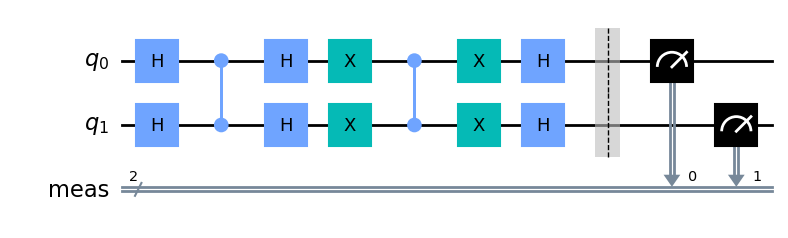

In [2]:
oracle11 = QuantumCircuit(2)
oracle11.cz(0,1)       # invert phase of |11>

diffuser = QuantumCircuit(2)
diffuser.h([0,1])    # |s>  -> |00>
diffuser.x([0,1])    # |00> -> |11>
diffuser.cz(0,1)     # reflect around |11>
diffuser.x([0,1])    # |11> -> |00>
diffuser.h([0,1])    # |00> -> |s>

grover11 = QuantumCircuit(2)
grover11.h([0,1])  # initialise |s>
grover11 = grover11.compose(oracle11)
grover11 = grover11.compose(diffuser)
grover11.measure_all()
grover11.draw(output='mpl')

In [3]:
sim = Aer.get_backend('aer_simulator')
sim.run(grover11).result().get_counts()

{'11': 1024}

### Oracle circuit for $|00\rangle$ state

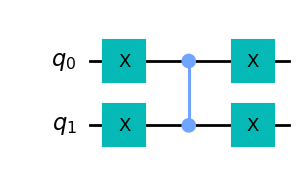

In [4]:
oracle00 = QuantumCircuit(2)
oracle00.x([0,1])
oracle00.cz(0,1)  # invert phase of |11>
oracle00.x([0,1])
oracle00.draw(output='mpl')

### Oracle circuit for $|01\rangle$ state

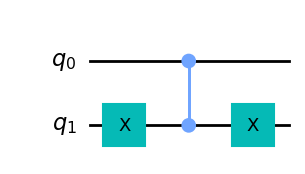

In [5]:
oracle01 = QuantumCircuit(2)
oracle01.x(1)
oracle01.cz(1,0)
oracle01.x(1)
oracle01.draw(output='mpl')

### Oracle circuit for $|10\rangle$ state

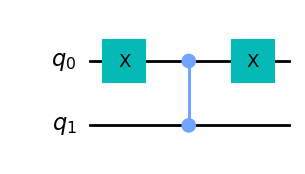

In [6]:
oracle10 = QuantumCircuit(2)
oracle10.x(0)
oracle10.cz(1,0)
oracle10.x(0)
oracle10.draw(output='mpl')

### Oracle circuit for $|11\rangle$ state

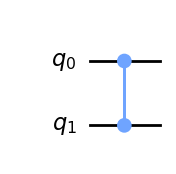

In [7]:
oracle11 = QuantumCircuit(2)
oracle11.cz(0,1)  # invert phase of |11>
oracle11.draw(output='mpl')

In [8]:
oracles = [oracle00, oracle01, oracle10, oracle11]

def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    sim = Aer.get_backend('aer_simulator')
    
    qc = qc.copy()  # Create a copy of the circuit to work with
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

for oracle in oracles:
    print(oracle)
    display_unitary(oracle, "U_\\text{oracle}=")

     ┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_1: ┤ X ├─■─┤ X ├
     └───┘   └───┘


<IPython.core.display.Latex object>

                  
q_0: ──────■──────
     ┌───┐ │ ┌───┐
q_1: ┤ X ├─■─┤ X ├
     └───┘   └───┘


<IPython.core.display.Latex object>

     ┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     └───┘ │ └───┘
q_1: ──────■──────
                  


<IPython.core.display.Latex object>

        
q_0: ─■─
      │ 
q_1: ─■─
        


<IPython.core.display.Latex object>

### Diffuser

Next we create the diffuser for two qubits. Applyihg the H gate to each cubit performs $|s\rangle \rightarrow |00\rangle$. We then transform this state to the solution state (first consider $|11\rangle$), reflect around the solution state, and then transform back to $|s\rangle$.

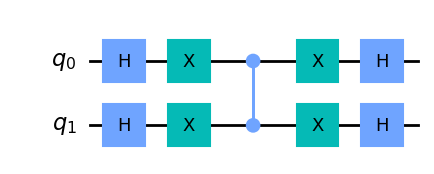

In [9]:
diffuser = QuantumCircuit(2)

diffuser.h([0,1])  # |s>  -> |00>
diffuser.x([0,1])  # |00> -> |11>
diffuser.cz(0,1)   # reflect around |11>
diffuser.x([0,1])  # |11> -> |00>
diffuser.h([0,1])  # |00> -> |s>

diffuser.draw(output='mpl')

### Composite circuit

The composite circuit is then (for the $|11\rangle$ oracle):

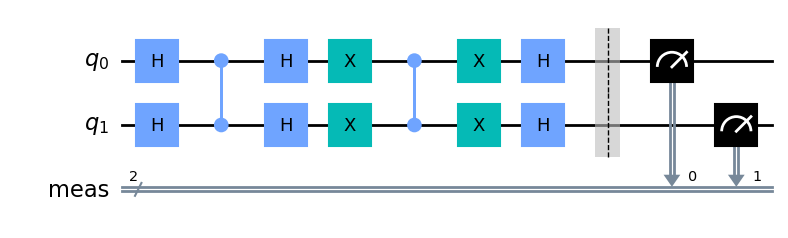

In [10]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle11)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw(output='mpl')

For all oracles:

In [12]:
for oracle in oracles:
    
    grover = QuantumCircuit(2)
    grover.h([0,1])  # initialise |s>
    grover = grover.compose(oracle)
    grover = grover.compose(diffuser)
    grover.measure_all()
    print(grover)
    
    sim = Aer.get_backend('aer_simulator')
    display(sim.run(grover).result().get_counts())

        ┌───┐┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤├───┤ │ ├───┤├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘└───┘   └───┘└───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1 


{'00': 1024}

        ┌───┐        ┌───┐┌───┐        ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──────■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─░─┤M├───
        ├───┤┌───┐ │ ├───┤├───┤┌───┐ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘└───┘   └───┘└───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1 


{'01': 1024}

        ┌───┐┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤└───┘ │ ├───┤├───┤└───┘ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├──────■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘        └───┘└───┘        └───┘└───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1 


{'10': 1024}

        ┌───┐   ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1 


{'11': 1024}